In [114]:
# 라이브러리 import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib

In [115]:
# 폰트 꺠짐 방지
font_path = 'C:/windows/Fonts/gulim.ttc'
font = fm.FontProperties(fname=font_path).get_name()
matplotlib.rc('font', family=font)

In [116]:
# 파일 read
btc_df = pd.read_csv('./data/BTC_USD.csv')
snp_df = pd.read_csv('./data/snp500.csv')

In [117]:
# 파일 check
btc_df

,Date,Price,Open,High,Low,Vol.,Change %
0,01/16/2025,"99,748.0","100,490.0","100,790.0","99,134.0",0.77K,-0.74%
1,01/15/2025,"100,490.0","96,701.0","100,660.0","96,664.0",0.73K,3.92%
2,01/14/2025,"96,701.0","94,682.0","97,451.0","94,492.0",0.49K,2.13%
3,01/13/2025,"94,682.0","94,574.0","95,967.0","89,939.0",1.85K,0.11%
4,01/12/2025,"94,574.0","94,716.0","95,511.0","93,835.0",0.23K,-0.15%
...,...,...,...,...,...,...,...
4660,04/10/2012,4.8,4.8,4.8,4.8,NaN,0.00%
4661,04/09/2012,4.9,4.9,4.9,4.9,NaN,1.67%
4662,04/08/2012,4.8,4.8,4.8,4.8,NaN,2.13%
4663,04/07/2012,4.7,4.7,4.7,4.7,NaN,-5.25%


In [118]:
# 파일 check
snp_df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1,1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
2,1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
3,1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
4,1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...,...
23965,2023-05-26 00:00:00-04:00,4156.160156,4212.870117,4156.160156,4205.450195,3715460000,0.0,0.0
23966,2023-05-30 00:00:00-04:00,4226.709961,4231.100098,4192.180176,4205.520020,4228510000,0.0,0.0
23967,2023-05-31 00:00:00-04:00,4190.740234,4195.439941,4166.149902,4179.830078,5980670000,0.0,0.0
23968,2023-06-01 00:00:00-04:00,4183.029785,4232.430176,4171.640137,4221.020020,4391860000,0.0,0.0


In [119]:
# 데이터 전처리 
# 불필요한 속성 제거
btc_df.drop(['Open', 'High', 'Low', 'Vol.', 'Change %'], axis=1, inplace=True)
# btc_df
snp_df.drop(['Volume', 'Dividends', 'Stock Splits', 'Close', 'Open'], axis=1, inplace=True)
snp_df

,Date,High,Low
0,1927-12-30 00:00:00-05:00,17.660000,17.660000
1,1928-01-03 00:00:00-05:00,17.760000,17.760000
2,1928-01-04 00:00:00-05:00,17.719999,17.719999
3,1928-01-05 00:00:00-05:00,17.549999,17.549999
4,1928-01-06 00:00:00-05:00,17.660000,17.660000
...,...,...,...
23965,2023-05-26 00:00:00-04:00,4212.870117,4156.160156
23966,2023-05-30 00:00:00-04:00,4231.100098,4192.180176
23967,2023-05-31 00:00:00-04:00,4195.439941,4166.149902
23968,2023-06-01 00:00:00-04:00,4232.430176,4171.640137


In [120]:
#snp 데이터 년/월/일 순으로 수정정
snp_df['Date'] = snp_df['Date'].str.split(' ').str[0]
snp_df

,Date,High,Low
0,1927-12-30,17.660000,17.660000
1,1928-01-03,17.760000,17.760000
2,1928-01-04,17.719999,17.719999
3,1928-01-05,17.549999,17.549999
4,1928-01-06,17.660000,17.660000
...,...,...,...
23965,2023-05-26,4212.870117,4156.160156
23966,2023-05-30,4231.100098,4192.180176
23967,2023-05-31,4195.439941,4166.149902
23968,2023-06-01,4232.430176,4171.640137


In [121]:
btc_df['Date'] = pd.to_datetime(btc_df['Date'], format='%m/%d/%Y').dt.strftime('%Y-%m-%d')
btc_df

,Date,Price
0,2025-01-16,"99,748.0"
1,2025-01-15,"100,490.0"
2,2025-01-14,"96,701.0"
3,2025-01-13,"94,682.0"
4,2025-01-12,"94,574.0"
...,...,...
4660,2012-04-10,4.8
4661,2012-04-09,4.9
4662,2012-04-08,4.8
4663,2012-04-07,4.7


In [122]:
# snp 데이터 프라이스 생성 -> 최고가,최저가 평균  
# snp 데이터 High, Low 제거거
snp_df['Price'] = (snp_df['High'] + snp_df['Low']) / 2
snp_df.drop(['High', 'Low'], axis=1, inplace=True)
snp_df

,Date,Price
0,1927-12-30,17.660000
1,1928-01-03,17.760000
2,1928-01-04,17.719999
3,1928-01-05,17.549999
4,1928-01-06,17.660000
...,...,...
23965,2023-05-26,4184.515137
23966,2023-05-30,4211.640137
23967,2023-05-31,4180.794922
23968,2023-06-01,4202.035156


In [123]:
# Date 통일을 위한 Index 찾기기
# 문제발생(주식은 주말, 휴장일이 있음 !! -> 코인과 다름)

date_index = snp_df[snp_df['Date'] == '2012-04-09'].index
#21163번이 2012-04-09
snp_df = snp_df.iloc[21163:].reset_index(drop=True)

snp_df


,Date,Price
0,2012-04-09,1387.844971
1,2012-04-10,1370.195007
2,2012-04-11,1366.844971
3,2012-04-12,1378.450012
4,2012-04-13,1378.729980
...,...,...
2802,2023-05-26,4184.515137
2803,2023-05-30,4211.640137
2804,2023-05-31,4180.794922
2805,2023-06-01,4202.035156


In [124]:
# btc 데이터 오름차순으로 변경경
btc_df = btc_df.sort_values(by='Date', ascending=True).reset_index(drop=True)
btc_df

,Date,Price
0,2012-04-06,4.9
1,2012-04-07,4.7
2,2012-04-08,4.8
3,2012-04-09,4.9
4,2012-04-10,4.8
...,...,...
4660,2025-01-12,"94,574.0"
4661,2025-01-13,"94,682.0"
4662,2025-01-14,"96,701.0"
4663,2025-01-15,"100,490.0"


In [138]:
# 공통 날짜만 남기기
# isin을 통해서 공통을 찾고 두 데이터에 해당 날짜만 남기기기
common_dates = snp_df[snp_df['Date'].isin(btc_df['Date'])]['Date']
# common_dates
snp_df = snp_df[snp_df['Date'].isin(common_dates)]
btc_df = btc_df[btc_df['Date'].isin(common_dates)]
if print(len(snp_df)) == print(len(btc_df)) :
    print("Let's Go")
else : 
    print("Try Again")
btc_df

2806
2806
Let's Go


,Date,Price
3,2012-04-09,4.9
4,2012-04-10,4.8
5,2012-04-11,4.9
6,2012-04-12,4.9
7,2012-04-13,4.9
...,...,...
4063,2023-05-26,"26,737.0"
4067,2023-05-30,"27,723.0"
4068,2023-05-31,"27,220.0"
4069,2023-06-01,"26,833.0"


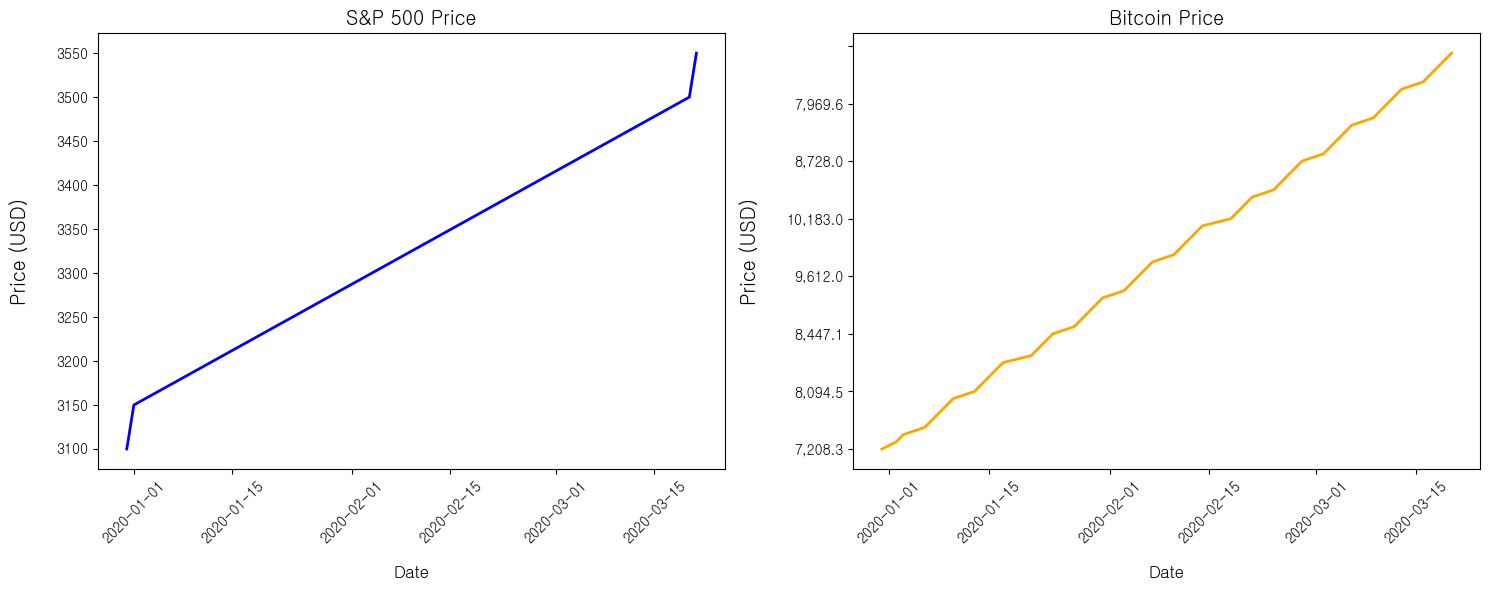

Start Date: 2019-12-31
End Date: 2020-03-21


In [149]:
from matplotlib.ticker import MaxNLocator

start_date = "2019-12-31"
end_date = "2020-03-21"

# 날짜 범위 생성
date_range = pd.date_range(start=start_date, end=end_date)

snp_filtered_df = snp_df[snp_df['Date'].isin(date_range)]
btc_filtered_df = btc_df[btc_df['Date'].isin(date_range)]

# 만약 시작 날짜나 끝 날짜가 데이터에 없으면 가장 가까운 날짜로 대체
if snp_filtered_df.empty:
    start_date = snp_df.loc[snp_df['Date'] >= pd.to_datetime(start_date), 'Date'].min()
    end_date = snp_df.loc[snp_df['Date'] <= pd.to_datetime(end_date), 'Date'].max()

    # 새로운 날짜 범위 생성 (가장 가까운 날짜로 대체된 범위)
    date_range = pd.date_range(start=start_date, end=end_date)
    snp_filtered_df = snp_df[snp_df['Date'].isin(date_range)]
    btc_filtered_df = btc_df[btc_df['Date'].isin(date_range)]

fig, (ax1, ax2) = plt.subplots(figsize=(15, 6), ncols=2)  

ax1.plot(snp_filtered_df['Date'], snp_filtered_df['Price'], label='S&P 500 Price', color='blue', linewidth=2)
ax1.set_title('S&P 500 Price', fontsize=14)
ax1.set_xlabel('Date', fontsize=12, labelpad=15)
ax1.set_ylabel('Price (USD)', fontsize=14, labelpad=20, fontweight='bold')
ax1.tick_params(axis='x', rotation=45)

ax1.yaxis.set_major_locator(MaxNLocator(nbins=10))  

ax2.plot(btc_filtered_df['Date'], btc_filtered_df['Price'], label='Bitcoin Price', color='orange', linewidth=2)
ax2.set_title('Bitcoin Price', fontsize=14)
ax2.set_xlabel('Date', fontsize=12, labelpad=15)
ax2.set_ylabel('Price (USD)', fontsize=14, labelpad=20, fontweight='bold')
ax2.tick_params(axis='x', rotation=45)

ax2.yaxis.set_major_locator(MaxNLocator(nbins=10))  

plt.tight_layout()

plt.show()

print(f"Start Date: {start_date}")
print(f"End Date: {end_date}")





ToDo : 사건에 대해 그래프 해석?